# Introdução: 

Nesse projeto irei análisar o comportamento dos clientes da empresa, com o objetivo de ajudar a otimizar as campanhas de marketing.

Irei apresentar metódos que mostram:
- Como os clientes usam o produto
- Quando os clientes começam a comprar
- Quanto dinheiro cada cliente traz para a empresa
- Quando as despesas da empresa serão cobertas

Com isso poderei dizer aos especialistas do time de marketing onde e quanto investir.

# Carregando e preparando os dados:

In [1]:
#Importando as bibliotecas necessárias para a análise
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Carregando as bases de dados que serão usadas na análise

df_visits_log = pd.read_csv('/datasets/visits_log_us.csv')
df_orders_log = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

## df_visits_log

In [3]:
#Descartando possiveis dados duplicados no df_visits_log

df_visits_log = df_visits_log.drop_duplicates()

In [4]:
#Visualizando as informações básicas do df_visits_log

df_visits_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 16.5+ MB


In [5]:
#Visualizando estatísticas básicas no df_visits_log

df_visits_log.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
#Visualizando uma amostra do df_visits_log

df_visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Pude anilisar inicialmente que o df_visits_log não possui dados duplicados, e nem valores ausentes.
é também foi possivel ver que não existem valores atípicos. 

O tipo dos dados nas coluna 'End ts' e 'Start ts' precisará ser mudado para DateTime, pois se trata do horário e data de cada sessão. O restante das colunas está com o tipo de acordo. 

In [7]:
#Alterando o tipo dos dados nas coluna 'End Ts' e 'Start Ts' para DateTime

df_visits_log['End Ts'] = pd.to_datetime(df_visits_log['End Ts'])


df_visits_log['Start Ts'] = pd.to_datetime(df_visits_log['Start Ts'])


In [8]:
#verificando se está tudo correto

df_visits_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


## df_orders_log

In [9]:
#Descartando possiveis dados duplicados no df_visits_log

df_orders_log = df_orders_log.drop_duplicates()

In [10]:
#Visualizando as informações básicas do df_orders_log

df_orders_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [11]:
#Visualizando estatísticas básicas no df_orders_log

df_orders_log.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
#Visualizando uma amostra do df_visits_log

df_orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Analisando inicialmente o df_orders_log, vi que ele não possui dados duplicados, e nem valores ausentes. é também foi possivel ver que não existem valores atípicos.

O tipo dos dados nas coluna 'Buy Ts' precisará ser mudado para DateTime, pois se trata do horário e data de cada compra. O restante das colunas está com o tipo de acordo.

In [13]:
#Alterando o tipo dos dados nas coluna 'Buy Ts' para DateTime

df_orders_log['Buy Ts'] = pd.to_datetime(df_orders_log['Buy Ts'])

In [14]:
#verificando se está tudo correto

df_orders_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


## df_costs

In [15]:
#Descartando possiveis dados duplicados no df_costs

df_costs = df_costs.drop_duplicates()

In [16]:
#Visualizando as informações básicas do df_orders_log

df_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


In [17]:
#Visualizando estatísticas básicas no df_costs

df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [18]:
#Visualizando uma amostra do df_costs

df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Analisando inicialmente o df_costs, vi que ele não possui dados duplicados, e nem valores ausentes. é também foi possivel ver que não existem valores atípicos.

O tipo dos dados nas coluna 'dt' precisará ser mudado para DateTime, pois se trata da data de pubicação do anúncio. O restante das colunas está com o tipo de acordo.

In [19]:
#Alterando o tipo dos dados nas coluna 'dt' para DateTime

df_costs['dt'] = pd.to_datetime(df_costs['dt'])

In [20]:
#verificando se está tudo correto

df_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 79.4 KB


# Calculando as métricas e criando relatórios:

# Métricas de Produto

Quantas pessoas acessam o site a cada dia, semana e mês?

In [21]:
#calculando o número de usuários únicos que acessam o site

daily_users = df_visits_log.groupby(df_visits_log['Start Ts'].dt.date)['Uid'].nunique().sum()
weekly_users = df_visits_log.groupby(df_visits_log['Start Ts'].dt.to_period('W'))['Uid'].nunique().sum()
monthly_users = df_visits_log.groupby(df_visits_log['Start Ts'].dt.to_period('M'))['Uid'].nunique().sum()

#imprimindo os resultados
print(f'Total de usuários por dia: {daily_users}')
print(f'Total de usuários por semana: {weekly_users}')
print(f'Total de usuários por mês: {monthly_users}')

Total de usuários por dia: 330509
Total de usuários por semana: 302961
Total de usuários por mês: 278741


O fato de ter mais usuários no dia e menos no total do mês pode ser explicado pelo seguinte:

Repetição de Usuários: quando calculamos por dia, estamos contando quantos usuários únicos acessam o site em cada dia separadamente. Isso significa que um mesmo usuário que acessou o site em diferentes dias será contado várias vezes, uma vez para cada dia que acessou.

Agregação Mensal: Quando calculamos o Total de usuários por mês, estamos somando o número de usuários únicos encontrados em todos os meses. Isso não leva em consideração a repetição de usuários em diferentes meses. Portanto, é possível que usuários únicos tenham acessado o site em diferentes meses, mas eles são contados apenas uma vez no total mensal.

Quantas sessões ocorrem por dia?

In [22]:
#calculando quantas sessões ocorrem por dia em média
sessions_per_day = df_visits_log.groupby(df_visits_log['Start Ts'].dt.date)['Uid'].count().mean()

sessions_per_day

987.3626373626373

Que comprimento tem cada sessão?

In [23]:
#Calculando a duração de cada sessão em segundos
df_visits_log['Session Duration'] = (df_visits_log['End Ts'] - df_visits_log['Start Ts']).dt.total_seconds()

#Calculando a duração média de cada sessão
average_session_duration = df_visits_log['Session Duration'].mean()


print(f'Duração média de cada sessão: {average_session_duration:.2f} segundos')

Duração média de cada sessão: 643.03 segundos


Quantos usuários retornam ao site?

In [24]:
#calculando a porcentagem de usuários que retornam ao site, ou seja acessam mais de uma vez 
returning_users_rate = (df_visits_log['Uid'].duplicated().sum() / df_visits_log['Uid'].count()) * 100

print(f'A porcentagem de usuários que retornam ao site é de: {returning_users_rate:.2f}%')

A porcentagem de usuários que retornam ao site é de: 36.51%


# Métricas de Vendas

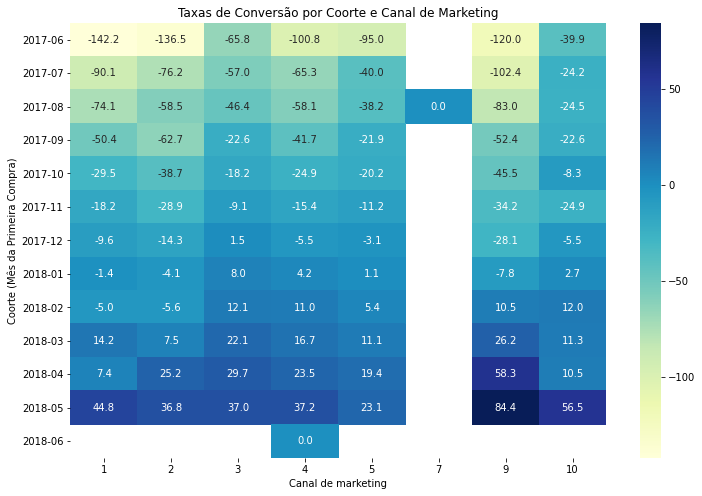

In [25]:
#Encontrando a data da primeira compra para cada usuário
first_purchase_date = df_orders_log.groupby('Uid')['Buy Ts'].min()

#Mapeando a data da primeira compra de volta para o DataFrame de visitas
df_visits_log['First Purchase Date'] = df_visits_log['Uid'].map(first_purchase_date)

#Removendo valores nulos na coluna 'First Purchase Date'
df_visits_log.dropna(subset=['First Purchase Date'], inplace=True)

#Calculando a diferença entre a data da primeira compra e a data de registro
df_visits_log['Conversion'] = (df_visits_log['First Purchase Date'] - df_visits_log['Start Ts']).dt.days

#Criando a coorte de mês da primeira compra
df_visits_log['First Purchase Month'] = df_visits_log['First Purchase Date'].dt.to_period('M')

#Calculando as taxas de conversão por coorte e canal
conversion_rates = df_visits_log.groupby(['First Purchase Month', 'Source Id'])['Conversion'].mean().unstack()

#Plotando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conversion_rates, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Taxas de Conversão por Coorte e Canal de Marketing')
plt.xlabel('Canal de marketing')
plt.ylabel('Coorte (Mês da Primeira Compra)')
plt.show()

Ao interpretar o heatmap, pude fazer algumas análises:

Comparação de Canais: Olhando ao longo das linhas, podemos comparar como os diferentes canais de marketing estão performando em termos de conversão ao longo das diferentes coortes. Canais com tons mais escuros indicam taxas de conversão mais altas.

Tendências ao Longo do Tempo: Ao olhar ao longo das colunas, podemos identificar tendências de conversão ao longo do tempo para cada canal. Coortes com tons mais escuros representam períodos de maior conversão.

Desafios: Coortes ou canais com tons mais claros indicam áreas onde a conversão pode estar mais baixa, permitindo identificar desafios que podem precisar de mais atenção.

In [26]:
#Métricas de Vendas
average_orders_per_customer = df_orders_log.groupby('Uid')['Buy Ts'].count().mean()
average_order_revenue = df_orders_log['Revenue'].mean()
total_revenue = df_orders_log['Revenue'].sum()
customer_lifetime_value = df_orders_log.groupby('Uid')['Revenue'].sum().mean()

#Imprimindo os resultados
print(f'Quantidade média de pedidos por cliente: {average_orders_per_customer:.2f}')
print(f'Média de receita por pedido: ${average_order_revenue:.2f}')
print(f'Receita total: ${total_revenue:.2f}')
print(f'Valor médio de vida do cliente (LTV): ${customer_lifetime_value:.2f}')

Quantidade média de pedidos por cliente: 1.38
Média de receita por pedido: $5.00
Receita total: $252057.20
Valor médio de vida do cliente (LTV): $6.90


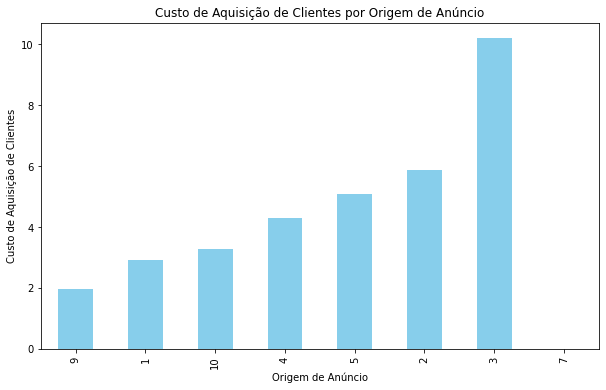

In [27]:
#Calculando o custo total por origem de anúncio
total_costs_by_source = df_costs.groupby('source_id')['costs'].sum()

#Calculando o número total de clientes por origem de anúncio
total_customers_by_source = df_visits_log.groupby('Source Id')['Uid'].nunique()

#Calculando o custo de aquisição de clientes por origem de anúncio
cac_by_source = total_costs_by_source / total_customers_by_source

#Plotando um gráfico de barras para mostrar o CAC por origem de anúncio
plt.figure(figsize=(10, 6))
cac_by_source.sort_values().plot(kind='bar', color='skyblue')
plt.title('Custo de Aquisição de Clientes por Origem de Anúncio')
plt.xlabel('Origem de Anúncio')
plt.ylabel('Custo de Aquisição de Clientes')
plt.show()


Ao interpretar o gráfico, podemos comparar visualmente o CAC (custo de aquisição de clientes) entre as origens de anúncio. As barras mais curtas indicam origens de anúncio que têm um CAC mais baixo, o que é bom, já que significa que a empresa está adquirindo clientes a um custo menor. Por outro lado, as barras mais altas indicam origens de anúncio com um CAC mais alto, o que pode sugerir que esses canais de marketing devem precisar de ajustes e mudanças.

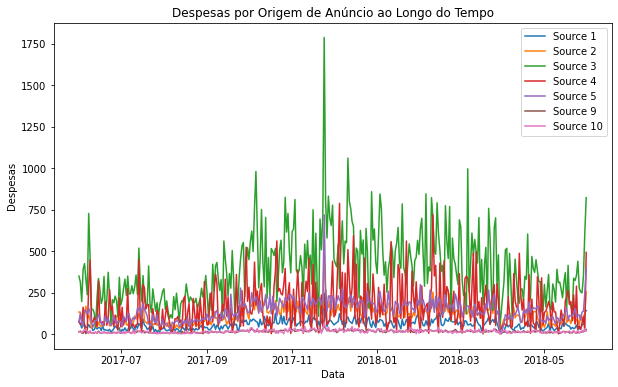

In [28]:
#Plotando um gráfico de linhas para mostrar as despesas por origem de anúncio ao longo do tempo

plt.figure(figsize=(10, 6))
for source_id, data in df_costs.groupby('source_id'):
    plt.plot(data['dt'], data['costs'], label=f'Source {source_id}')
plt.title('Despesas por Origem de Anúncio ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Despesas')
plt.legend()
plt.show()

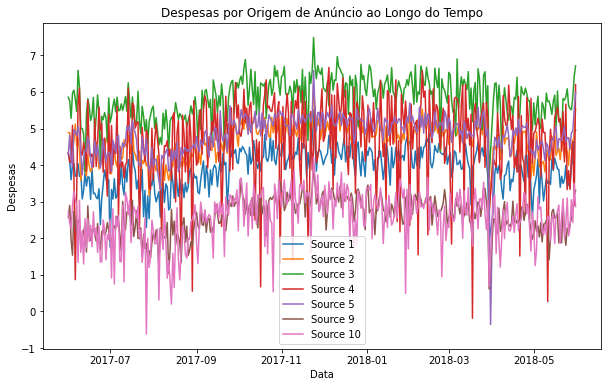

In [34]:
#Plotando um gráfico de linhas para mostrar as despesas por origem de anúncio ao longo do tempo

plt.figure(figsize=(10, 6))
for source_id, data in df_costs.groupby('source_id'):
    plt.plot(data['dt'], np.log(data['costs']), label=f'Source {source_id}')
plt.title('Despesas por Origem de Anúncio ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Despesas')
plt.legend()
plt.show()

O gráfico permite que visualizemos como as despesas de marketing evoluíram ao longo do tempo para diferentes origens de anúncio. Você pode identificar padrões de aumento ou diminuição de despesas em relação a datas específicas ou observar as flutuações nas despesas de diferentes origens de anúncio.

Cada linha representa as despesas de marketing associadas a uma origem de anúncio específica. A trajetória da linha ao longo do tempo mostra como as despesas para cada origem de anúncio variaram durante o período

# Métricas de Marketing

Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [29]:
#Total gasto em marketing
total_marketing_costs = df_costs['costs'].sum()
total_marketing_costs

329131.62

In [30]:
#Custo de aquisição por origem (anuncio)
acquisition_cost_per_source = df_costs.groupby('source_id')['costs'].sum() / df_costs.groupby('source_id')['source_id'].count()
acquisition_cost_per_source

source_id
1      57.391928
2     117.922975
3     389.315785
4     168.246832
5     142.189835
9      15.199697
10     16.039917
dtype: float64

In [31]:
#Retorno sobre o investimento (ROI)
df_orders_log['order_month'] = df_orders_log['Buy Ts'].dt.to_period('M')
revenue_per_month = df_orders_log.groupby('order_month')['Revenue'].sum()

df_costs['month'] = df_costs['dt'].dt.to_period('M')
df_costs = df_costs.merge(revenue_per_month, left_on='month', right_index=True)
df_costs['roi'] = df_costs['Revenue'] / df_costs['costs']

average_roi_per_source = df_costs.groupby('source_id')['roi'].mean()

average_roi_per_source

source_id
1      426.268671
2      196.824834
3       67.169378
4      550.755740
5      272.258266
9     1547.583558
10    1894.551039
Name: roi, dtype: float64

# Conclusão

1. Recomendação de Investimento Total:

Considerando o retorno sobre investimento (ROI) e o custo de aquisição por origem, recomendo que os especialistas de marketing mantenham ou aumentem o investimento no marketing, dada a perspectiva positiva de retorno. O total gasto em marketing foi alto, mas com base na análise do ROI, os investimentos parecem valer a pena.

2. Escolha de Origens/Plataformas:
Minha recomendação para escolher origens ou plataformas de marketing se baseia nas seguintes métricas:

Custo de Aquisição por Origem: Recomendos focar em origens ou plataformas que tenham custos de aquisição mais baixos em relação ao número de clientes adquiridos. Isso otimiza o gasto de marketing.

Retorno Sobre Investimento (ROI): Dê preferência às origens ou plataformas com ROI mais alto. Isso indica que o dinheiro investido nessas origens tem maior probabilidade de gerar receita.

Volume de Compras por Cliente (LTV): Origens que geram clientes com maior valor médio de vida (LTV) devem ser priorizadas, pois esses clientes trazem mais receita ao longo do tempo.

As origens que apresentarem os melhores resultados em termos de custo de aquisição, ROI e LTV devem ser as principais candidatas para receberem mais investimento.

3. Conclusões Gerais:

O produto tem uma base de usuários sólida, com boa atividade diária, semanal e mensal. A frequência de retorno dos usuários também é positiva.

O comprimento médio da sessão sugere que os usuários estão engajados com o produto, mas é importante acompanhar essa métrica ao longo do tempo para verificar a tendência.

O período entre registro e conversão é uma métrica crítica para entender o comportamento de compra dos usuários. Isso ajuda a determinar a eficácia dos canais de marketing e a otimizar a estratégia de aquisição.

O volume médio de compra é um indicador chave da eficácia do processo de conversão do produto e da satisfação do cliente.

Os valores de ROI indicam que os investimentos em marketing estão gerando um retorno positivo, mas é importante monitorar esses valores ao longo do tempo para garantir sua sustentabilidade.

A análise de custo de aquisição por origem ajuda a identificar quais canais estão fornecendo clientes a um custo mais baixo.

O LTV é um indicador crítico da saúde financeira a longo prazo da empresa e deve ser maximizado.

No geral, uma abordagem equilibrada, combinando as métricas de aquisição, engajamento e retorno financeiro, fornecerá uma base sólida para os especialistas de marketing tomar decisões informadas sobre alocação de recursos e estratégia de investimento.